<a href="https://colab.research.google.com/github/XERYVEL/Trabajo_Final_Cs_Datos/blob/main/Trabajo_Final_de_Informatica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Bienvenido al programa de Predicción del precio de Alquileres de Propiedades en Rosario ===
¿Quieres iniciar el programa? (Si/No): s
Este sistema te ayudará a estimar el valor de alquiler de propiedades en Rosario.
Solo necesitás seleccionar el tipo de propiedad, una opción disponible y el estado actual del mercado.
Archivo cargado correctamente: /content/Predicciones alquileres (2).xlsx
📊 Resumen del mercado cargado:
Total de propiedades: 14
 - Casa: 6
 - Departamento: 6
 - Monoambiente: 2


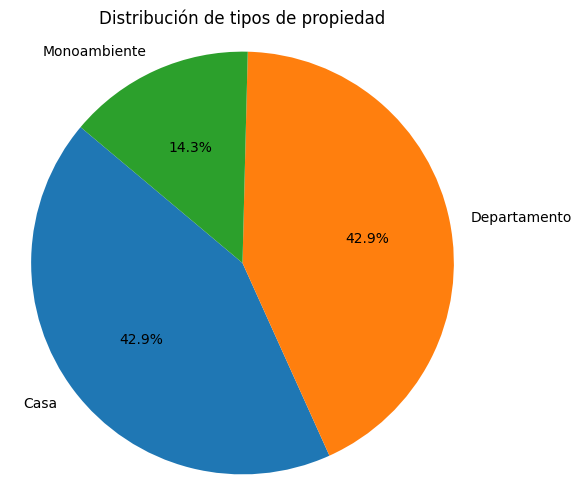

Seleccione tipo de propiedad:
1 - Casa
2 - Departamento
3 - Monoambiente
Ingrese 1, 2 o 3: 3
Se encontraron 2 propiedades tipo Monoambiente.
Propiedades disponibles:
ID   Tipo            Barrio          Ambientes  Metros² 
-------------------------------------------------------
2    Monoambiente    Echesortu       1          31m2    
10   Monoambiente    Bella Vista     1          24m2    
Ingrese ID de propiedad para precio (o 'salir' para terminar): 2
¿Cómo está el mercado de alquileres en Rosario?
1 - Alto (precios suben)
2 - Estable (precios sin cambio)
3 - En baja (precios bajan)
Ingrese 1, 2 o 3: 1
¿Quieres ver el promedio estimado por barrio para este tipo de propiedad? (Si/No): s
🏘️ Promedio estimado de alquiler por barrio (aproximado):
 - Echesortu: 220194.48 ARS
 - Bella Vista: 146119.84 ARS
¿Quieres ver el gráfico de barras con los promedios para este tipo de propiedad? (Si/No): s


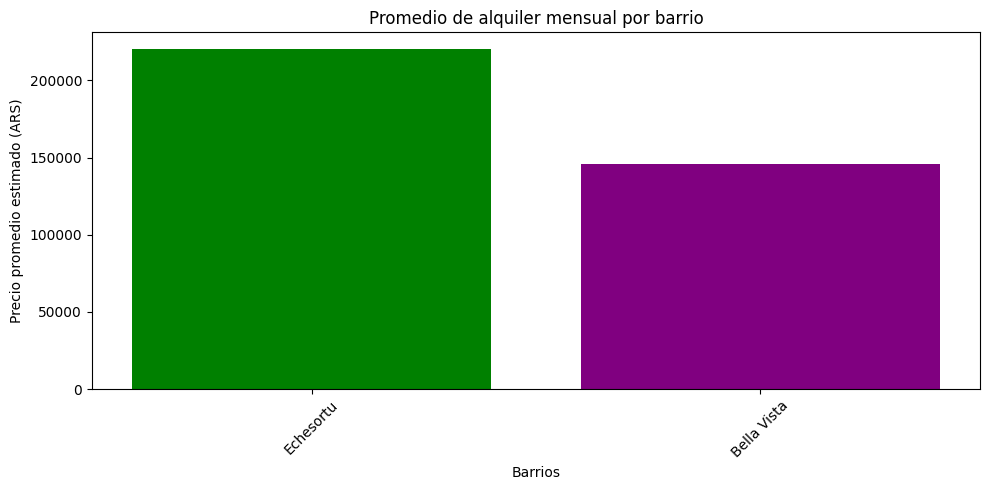

¿Quieres ver el mapa de Rosario? (Si/No): s


Elija moneda para la valuación:
1 - Pesos Argentinos (ARS)
2 - Dólares Estadounidenses (USD)
Ingrese 1 o 2: 1
--- Detalle de la propiedad ---
Tipo: Monoambiente
Barrio: Echesortu
Ambientes: 1
Antigüedad: 10 años
Metros cuadrados: 31m2
💰Precio estimado de alquiler: 220194.48 ARS
¿Deseas consultar otra propiedad? (Si/No): s
Seleccione tipo de propiedad:
1 - Casa
2 - Departamento
3 - Monoambiente
Ingrese 1, 2 o 3: 2
Se encontraron 6 propiedades tipo Departamento.
Propiedades disponibles:
ID   Tipo            Barrio          Ambientes  Metros² 
-------------------------------------------------------
3    Departamento    Bella Vista     3          45m2    
5    Departamento    Bella Vista     3          40m2    
6    Departamento    Bella Vista     3          38m2    
7    Departamento    Bella Vista     3          40m2    
13   Departamento    Zona Norte      3          70m2    
14   Departamento    Parque          2          38m2    
Ingrese ID de propiedad para precio (o 'salir' para ter

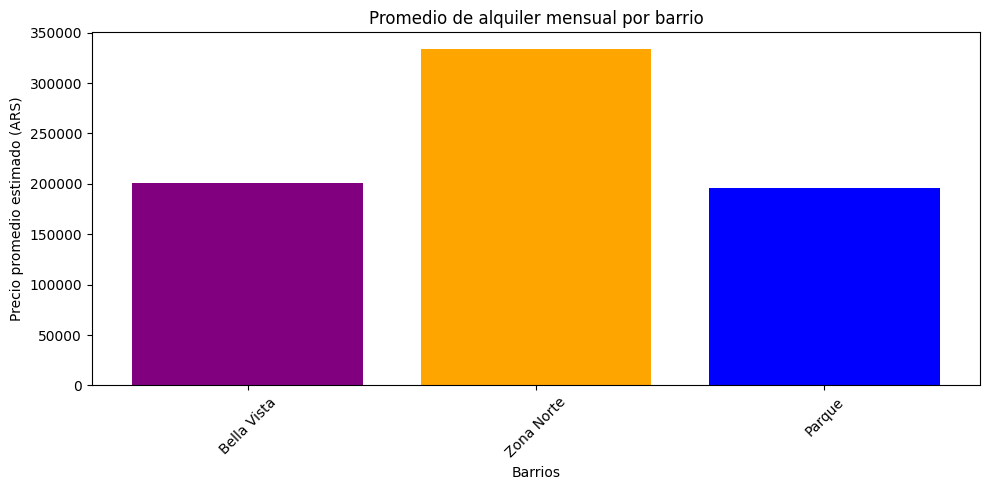

¿Quieres ver el mapa de Rosario? (Si/No): s


Elija moneda para la valuación:
1 - Pesos Argentinos (ARS)
2 - Dólares Estadounidenses (USD)
--- Detalle de la propiedad ---
Tipo: Departamento
Barrio: Bella Vista
Ambientes: 3
Antigüedad: 60 años
Metros cuadrados: 45m2
💰Precio estimado de alquiler: 229523.83 ARS


KeyboardInterrupt: Interrupted by user

In [ ]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import folium
import matplotlib.pyplot as plt
from folium.plugins import Fullscreen
from IPython.display import display

def cargar_datos(nombre_archivo):
 try:
  return pd.read_excel(nombre_archivo)
 except Exception as e:
  print(f"Error al cargar archivo: {e}")
  return None

def iniciar_programa():
 print("=== Bienvenido al programa de Predicción del precio de Alquileres de Propiedades en Rosario ===")
 while True:
  respuesta = input("¿Quieres iniciar el programa? (Si/No): ").strip().lower()
  if respuesta in ["s", "si"]:
   return True
  elif respuesta in ["n", "no"]:
   print("Programa finalizado. ¡Hasta la proxima!")
   return False
  else:
   print("Opción no válida. Ingrese 's' para sí o 'n' para no.")

def pedir_archivo():
 while True:
  nombre = "/content/Predicciones alquileres (2).xlsx"
  df = cargar_datos(nombre)
  if df is not None:
   print(f"Archivo cargado correctamente: {nombre}")
   return df
  else:
   print("No se pudo cargar el archivo, intente nuevamente.")
   break

def resumen_mercado(df):
 print("📊 Resumen del mercado cargado:")
 print(f"Total de propiedades: {len(df)}")
 tipos = df['Tipo de propiedad'].value_counts()
 for tipo, cantidad in tipos.items():
  print(f" - {tipo}: {cantidad}")

def estado_mercado():
 print("¿Cómo está el mercado de alquileres en Rosario?")
 print("1 - Alto (precios suben)")
 print("2 - Estable (precios sin cambio)")
 print("3 - En baja (precios bajan)")
 while True:
  elec = input("Ingrese 1, 2 o 3: ").strip()
  if elec == '1': return 1.10
  if elec == '2': return 1.00
  if elec == '3': return 0.90
  print("Opción inválida, intente de nuevo.")

def calcular_precio(prop, factor_mercado):
 barrio = prop['Barrio'].strip().lower()
 base_por_m2 = {
  'parque': 3500,
  'echesortu': 3500,
  'belgrano': 3500,
  'bella vista': 3000,
  'zona norte': 3000,
  'zona oeste': 2500,
  'zona suroeste': 2500
 }.get(barrio, 3000)

 ambientes = prop['Cantidad de ambiente']
 tipo_propiedad = prop['Tipo de propiedad'].lower()

 if tipo_propiedad == 'monoambiente':
  factor_ambiente = 1.10
 else:
  factor_ambiente = 1 + (0.25 if tipo_propiedad == 'departamento' else 0.15) * (ambientes - 1)

 factor_ajuste_tipo = 1.0

 if tipo_propiedad == 'monoambiente':
  factor_ajuste_tipo = 1.50

 antigüedad = prop['Antigüedad de la propiedad']
 if antigüedad <= 10: factor_antigüedad = 1.10
 elif antigüedad > 30: factor_antigüedad = 0.90
 else: factor_antigüedad = 1.0

 factor_cochera = 1.12 if str(prop['Cochera']).strip().upper() == 'SI' else 1.0
 factor_balcon = 1.07 if str(prop['Balcon']).strip().upper() == 'SI' else 1.0
 factor_terraza = 1.07 if str(prop['Terraza']).strip().upper() == 'SI' else 1.0
 factor_patio = 1.07 if str(prop['Patio']).strip().upper() == 'SI' else 1.0

 restric = str(prop['Restricciones(Si las hay)']).lower()
 factor_restric = 0.95 if 'no se permite' in restric else 1.0

 metros = float(str(prop['Metros cuadrados']).replace('m2','').strip())

 precio = base_por_m2 * metros * factor_ambiente * factor_antigüedad * factor_cochera * factor_balcon * factor_terraza * factor_patio * factor_restric * factor_ajuste_tipo
 precio *= factor_mercado
 return round(precio, 2)

def precio_promedio_por_barrio(df, factor_mercado):
 print("🏘️ Promedio estimado de alquiler por barrio (aproximado):")
 barrios = df['Barrio'].unique()
 for barrio in barrios:
  subset = df[df['Barrio'] == barrio]
  if not subset.empty:
   precios = [calcular_precio(row, factor_mercado) for _, row in subset.iterrows()]
   promedio = round(sum(precios) / len(precios), 2)
   print(f" - {barrio}: {promedio} ARS")

def graficar_promedio_por_barrio(df, factor_mercado):
 barrios = df['Barrio'].unique()
 colores_barrios = {
  "Parque": "blue",
  "Echesortu": "green",
  "Belgrano": "red",
  "Bella Vista": "purple",
  "Zona Norte": "orange",
  "Zona Oeste": "darkblue",
  "Zona Suroeste": "darkred"
 }

 promedios = []
 colores = []

 for barrio in barrios:
  subset = df[df['Barrio'] == barrio]
  if not subset.empty:
   precios = [calcular_precio(row, factor_mercado) for _, row in subset.iterrows()]
   promedio = round(sum(precios) / len(precios), 2)
   promedios.append(promedio)
   colores.append(colores_barrios.get(barrio, 'gray'))

 plt.figure(figsize=(10, 5))
 plt.bar(barrios, promedios, color=colores)
 plt.xticks(rotation=45)
 plt.xlabel('Barrios')
 plt.ylabel('Precio promedio estimado (ARS)')
 plt.title('Promedio de alquiler mensual por barrio')
 plt.tight_layout()
 plt.show(block=False)
 plt.pause(0.1)
 plt.close()

def graficar_distribucion_tipo(df):
 tipos = df['Tipo de propiedad'].value_counts()
 colores = ['#1f77b4', '#ff7f0e', '#2ca02c']
 plt.figure(figsize=(6,6))
 plt.pie(tipos, labels=tipos.index, autopct='%1.1f%%', colors=colores, startangle=140)
 plt.title('Distribución de tipos de propiedad')
 plt.axis('equal')
 plt.show(block=False)
 plt.pause(0.1)
 plt.close()

def mostrar_propiedades(df):
 print("Propiedades disponibles:")
 print(f"{'ID':<4} {'Tipo':<15} {'Barrio':<15} {'Ambientes':<10} {'Metros²':<8}")
 print("-"*55)
 for _, r in df.iterrows():
  print(f"{r['ID de la propiedad']:<4} {r['Tipo de propiedad']:<15} {r['Barrio']:<15} {r['Cantidad de ambiente']:<10} {r['Metros cuadrados']:<8}")

def filtrar_por_tipo(df):
 print("Seleccione tipo de propiedad:")
 print("1 - Casa")
 print("2 - Departamento")
 print("3 - Monoambiente")
 tipos = { '1': 'Casa', '2': 'Departamento', '3': 'Monoambiente' }
 while True:
  eleccion = input("Ingrese 1, 2 o 3: ").strip()
  if eleccion in tipos:
   tipo_sel = tipos[eleccion]
   df_filtrado = df[df['Tipo de propiedad'] == tipo_sel]
   if df_filtrado.empty:
    print(f"No hay propiedades tipo {tipo_sel}. Elija otra opción.")
   else:
    print(f"Se encontraron {len(df_filtrado)} propiedades tipo {tipo_sel}.")
    return df_filtrado
  else:
   print("Opción inválida, intente de nuevo.")

def elegir_moneda():
 print("Elija moneda para la valuación:")
 print("1 - Pesos Argentinos (ARS)")
 print("2 - Dólares Estadounidenses (USD)")
 while True:
  elec = input("Ingrese 1 o 2: ").strip()
  if elec == '1': return 'ARS', None
  if elec == '2':
   print("¿Quieres usar un valor fijo o ingresar el precio actual del dólar?")
   print("1 - Usar valor fijo (1200)")
   print("2 - Ingresar valor actual")
   while True:
    op = input("Ingrese 1 o 2: ").strip()
    if op == '1': return 'USD', 1200
    if op == '2':
     try:
      valor = float(input("Ingrese valor actual del dólar: ").strip())
      return 'USD', valor
     except:
      print("Valor inválido. Intente nuevamente.")
    else:
     print("Opción inválida.")
  print("Opción inválida, pruebe otra vez.")

def generar_mapa_barrios():
 mapa = folium.Map(location=[-32.96, -60.73], zoom_start=14, tiles='cartodb positron')
 Fullscreen().add_to(mapa)

 barrios = {
  "Parque": {"coords":[[-32.9510,-60.6620],[-32.9510,-60.6520],[-32.9440,-60.6520],[-32.9440,-60.6620]], "color":"blue"},
  "Echesortu": {"coords":[[-32.9460,-60.6790],[-32.9460,-60.6660],[-32.9380,-60.6660],[-32.9380,-60.6790]], "color":"green"},
  "Belgrano": {"coords":[[-32.9510,-60.7130],[-32.9510,-60.7030],[-32.9440,-60.7030],[-32.9440,-60.7130]], "color":"red"},
  "Bella Vista": {"coords":[[-32.9440,-60.6950],[-32.9440,-60.6840],[-32.9380,-60.6840],[-32.9380,-60.6950]], "color":"purple"},
  "Zona Norte": {"coords":[[-32.9060,-60.6750],[-32.9060,-60.6620],[-32.8950,-60.6620],[-32.8950,-60.6750]], "color":"orange"},
  "Zona Oeste": {"coords":[[-32.9600,-60.6750],[-32.9600,-60.6600],[-32.9500,-60.6600],[-32.9500,-60.6750]], "color":"darkblue"},
  "Zona Suroeste": {"coords":[[-32.9750,-60.6900],[-32.9750,-60.6750],[-32.9650,-60.6750],[-32.9650,-60.6900]], "color":"darkred"}
 }

 for barrio, data in barrios.items():
  folium.Polygon(
   locations=data["coords"],
   color='black',
   weight=1.5,
   fill=True,
   fill_color=data["color"],
   fill_opacity=0.6,
   tooltip=folium.Tooltip(barrio, permanent=True, direction='center')
  ).add_to(mapa)

 display(mapa) # Explicitly use display

def main():
 if not iniciar_programa():
  return

 print("Este sistema te ayudará a estimar el valor de alquiler de propiedades en Rosario.")
 print("Solo necesitás seleccionar el tipo de propiedad, una opción disponible y el estado actual del mercado.")

 df = pedir_archivo()
 if df is None:
  print("No se pudo cargar los datos. Saliendo.")
  return

 resumen_mercado(df)


 graficar_distribucion_tipo(df)

 continuar = True
 while continuar:
  df_filtrado = filtrar_por_tipo(df)
  mostrar_propiedades(df_filtrado)

  ids = df_filtrado['ID de la propiedad'].tolist()
  while True:
   id_sel_str = input("Ingrese ID de propiedad para precio (o 'salir' para terminar): ").strip()
   if id_sel_str.lower() == 'salir':
    continuar = False
    break
   if id_sel_str.isdigit():
    id_sel = int(id_sel_str)
    if id_sel in ids:
     break
    else:
     print("ID inválido, intente de nuevo.")
   else:
    print("Entrada inválida. Ingrese un número o 'salir'.")

  if not continuar:
      break

  factor = estado_mercado()

  while True:
   ver_promedios = input("¿Quieres ver el promedio estimado por barrio para este tipo de propiedad? (Si/No): ").strip().lower()
   if ver_promedios in ['s', 'si']:
    precio_promedio_por_barrio(df_filtrado, factor)
    while True:
     ver_grafico = input("¿Quieres ver el gráfico de barras con los promedios para este tipo de propiedad? (Si/No): ").strip().lower()
     if ver_grafico in ['s', 'si']:
      graficar_promedio_por_barrio(df_filtrado, factor)
      break
     elif ver_grafico in ['n', 'no']:
      break
     else:
      print("Opción inválida, intente de nuevo.")
    break
   elif ver_promedios in ['n', 'no']:
    break
   else:
    print("Opción inválida, intente de nuevo.")


  while True:
   ver_mapa = input("¿Quieres ver el mapa de Rosario? (Si/No): ").strip().lower()
   if ver_mapa in ['s', 'si']:
    generar_mapa_barrios() # This function now uses display internally
    break
   elif ver_mapa in ['n', 'no']:
    break
   else:
    print("Opción inválida, intente de nuevo.")

  moneda, valor_dolar = elegir_moneda()

  propiedad = df_filtrado[df_filtrado['ID de la propiedad'] == id_sel].iloc[0]
  precio = calcular_precio(propiedad, factor)

  if moneda == 'USD':
   if valor_dolar is None:
       print("Advertencia: Valor del dólar no especificado. Usando valor fijo (1200).")
       valor_dolar = 1200
   if valor_dolar != 0:
       precio = round(precio / valor_dolar, 2)
   else:
       print("Error: El valor del dólar no puede ser cero.")
       precio = "Indeterminable"

  print("--- Detalle de la propiedad ---")
  print(f"Tipo: {propiedad['Tipo de propiedad']}")
  print(f"Barrio: {propiedad['Barrio']}")
  print(f"Ambientes: {propiedad['Cantidad de ambiente']}")
  print(f"Antigüedad: {propiedad['Antigüedad de la propiedad']} años")
  print(f"Metros cuadrados: {propiedad['Metros cuadrados']}")
  print(f"💰Precio estimado de alquiler: {precio} {moneda}")

  while True:
   seguir = input("¿Deseas consultar otra propiedad? (Si/No): ").strip().lower()
   if seguir in ['s', 'si']:
    break
   elif seguir in ['n', 'no']:
    print("Muchas gracias por usar este programa de predicción de precios☺️. ¡Hasta la próxima👋🏻!")
    continuar = False
    break
   else:
    print("Opción inválida, ingresa 'Si' o 'No'.")

if __name__ == "__main__":
 main()